# Answer 1

In [1]:
#Read Text
with open("./data/A4_question1_data.txt", 'r') as fh:  
    descriptions = fh.read().splitlines()
print("Sample course descriptions :", descriptions[:2])

Sample course descriptions : ['[The Tragedie of Macbeth by William Shakespeare 1603]', '']


In [2]:
len(descriptions)

3286

Average word length

wi = length of word i

wavg = ∑ wi / N

In [3]:

w = [len(word) for line in descriptions for word in line.rstrip().split(" ")]
# important to convert to float!
w_avg = float(sum(w))/float(len(w))

print(w_avg)

3.9769875514556365


Average sentence length

In [4]:
def avg_sentence_len(text):
  sentences = text.split(".") #split the text into a list of sentences.
  words = text.split(" ") #split the input text into a list of separate words
  if(sentences[len(sentences)-1]==""): #if the last value in sentences is an empty string
    average_sentence_length = len(words) / len(sentences)-1
  else:
    average_sentence_length = len(words) / len(sentences)
  return average_sentence_length #returning avg length of sentence

sum_sen=0
for s in descriptions: 
    sum_sen=sum_sen+avg_sentence_len(s)
print(float(sum_sen)/float(len(descriptions)))

4.401171637248934


the number of times the word “king” appears

In [5]:
sum_king=0
for text in descriptions:
    words = text.split(" ") #split the input text into a list of separate words
    for s in words:
        if s=='king' or s=='King':
            sum_king=sum_king+1
print(sum_king)

15


In [6]:
### Import nltk (download nltk if not done before)
#Setup stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prakashsaini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#setup wordnet for lemmatization
# What is Wordnet? (https://en.wikipedia.org/wiki/WordNet)
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prakashsaini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prakashsaini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/prakashsaini/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Preparing Data for Text Classification

In [8]:
### Get Tfidf Scores
from sklearn.feature_extraction.text import TfidfVectorizer

#Custom tokenizer that will perform tokenization, stopword removal
#and lemmatization
def customtokenize(str):
    tokens=nltk.word_tokenize(str)
    ntokens = nltk.RegexpTokenizer(r"\w+")
    words = ntokens.tokenize(str)
    nostop = list(filter(lambda token: token not in stopwords.words('english'), words))
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

#Generate TFIDF matrix
vectorizer = TfidfVectorizer(tokenizer=customtokenize)
tfidf=vectorizer.fit_transform(descriptions)

print("\nSample feature names identified : ", vectorizer.get_feature_names()[:150])
print("\nSize of TFIDF matrix : ",tfidf.shape)
print(tfidf.toarray())


Sample feature names identified :  ['1', '1603', '2', '3', 'abhorred', 'abide', 'abiure', 'aboue', 'abound', 'abroad', 'absence', 'absent', 'absolute', 'abuse', 'accent', 'accesse', 'accompany', 'accompt', 'according', 'account', 'accounted', 'accurs', 'accursed', 'accust', 'accustom', 'acheron', 'acquaint', 'act', 'acted', 'acting', 'action', 'actuall', 'actus', 'addage', 'adde', 'added', 'adder', 'addition', 'addrest', 'adhere', 'adieu', 'admir', 'aduance', 'aduantage', 'aduice', 'aduise', 'afeard', 'affaire', 'affear', 'affection', 'affliction', 'affraid', 'afraid', 'afternoone', 'afterwards', 'againe', 'age', 'agent', 'agitation', 'ague', 'aid', 'ala', 'alack', 'alarme', 'alarum', 'aleppo', 'alike', 'aliue', 'allegeance', 'almost', 'alone', 'alowd', 'alreadie', 'already', 'also', 'alter', 'altogether', 'alwayes', 'amaz', 'amazedly', 'amazement', 'ambition', 'amen', 'amend', 'amends', 'amisse', 'among', 'ang', 'angel', 'angell', 'anger', 'angerly', 'angry', 'angus', 'annoyance', 'a

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### save tf-idf score in the excel

In [9]:
import pandas as pd


op=pd.DataFrame()

op['term']=vectorizer.get_feature_names()
op['tf-idf score']=tfidf.toarray()[0]
#save the Op dataframe into csv
op_file = op.to_csv('pred_output.csv')

op

,term,tf-idf score
0,1,0.000000
1,1603,0.484879
2,2,0.000000
3,3,0.000000
4,abhorred,0.000000
...,...,...
3151,yoake,0.000000
3152,yong,0.000000
3153,youl,0.000000
3154,young,0.000000


### Displaying the Wordcloud

In [10]:
str=''

for s in descriptions:
    str=str+s

# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Generate wordcloud data
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(str)


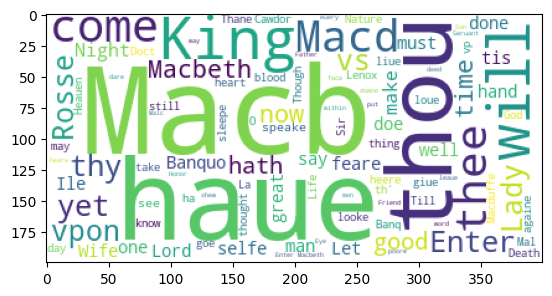

In [11]:
import matplotlib.pyplot as mpLib
mpLib.imshow(wordcloud)
mpLib.axis("on")
mpLib.show()

###  Enhancing Wordcloud

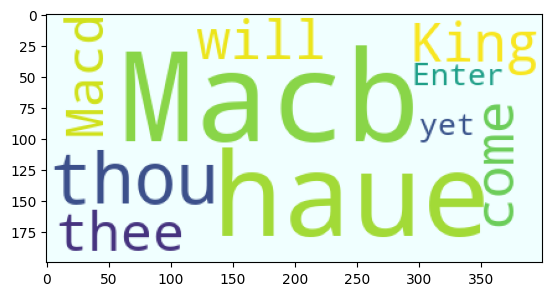

In [12]:
#Add more words to ignore 
stopwords.update(["need","use", "goal", "value"])

#Redo stop words. Limit number of words
wordcloud = WordCloud(stopwords=stopwords, max_words=10, \
                      background_color="azure").generate(str)

mpLib.imshow(wordcloud)
mpLib.axis("on")
mpLib.show()

# Answer 2

In [13]:
# load the data
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1()

In [14]:
rcv1.data.shape

(804414, 47236)

In [15]:
rcv1.target.shape

(804414, 103)

In [16]:
rcv1.data

<804414x47236 sparse matrix of type '<class 'numpy.float64'>'
	with 60915113 stored elements in Compressed Sparse Row format>

In [17]:
# print all the categories available 
print(rcv1.target_names[:].tolist())

['C11', 'C12', 'C13', 'C14', 'C15', 'C151', 'C1511', 'C152', 'C16', 'C17', 'C171', 'C172', 'C173', 'C174', 'C18', 'C181', 'C182', 'C183', 'C21', 'C22', 'C23', 'C24', 'C31', 'C311', 'C312', 'C313', 'C32', 'C33', 'C331', 'C34', 'C41', 'C411', 'C42', 'CCAT', 'E11', 'E12', 'E121', 'E13', 'E131', 'E132', 'E14', 'E141', 'E142', 'E143', 'E21', 'E211', 'E212', 'E31', 'E311', 'E312', 'E313', 'E41', 'E411', 'E51', 'E511', 'E512', 'E513', 'E61', 'E71', 'ECAT', 'G15', 'G151', 'G152', 'G153', 'G154', 'G155', 'G156', 'G157', 'G158', 'G159', 'GCAT', 'GCRIM', 'GDEF', 'GDIP', 'GDIS', 'GENT', 'GENV', 'GFAS', 'GHEA', 'GJOB', 'GMIL', 'GOBIT', 'GODD', 'GPOL', 'GPRO', 'GREL', 'GSCI', 'GSPO', 'GTOUR', 'GVIO', 'GVOTE', 'GWEA', 'GWELF', 'M11', 'M12', 'M13', 'M131', 'M132', 'M14', 'M141', 'M142', 'M143', 'MCAT']


In [18]:
print(rcv1.target)

  (0, 34)	1
  (0, 59)	1
  (0, 93)	1
  (0, 94)	1
  (0, 102)	1
  (1, 21)	1
  (1, 33)	1
  (2, 4)	1
  (2, 5)	1
  (2, 33)	1
  (2, 51)	1
  (2, 59)	1
  (2, 70)	1
  (2, 79)	1
  (3, 4)	1
  (3, 5)	1
  (3, 33)	1
  (4, 0)	1
  (4, 19)	1
  (4, 33)	1
  (5, 98)	1
  (5, 102)	1
  (6, 93)	1
  (6, 94)	1
  (6, 95)	1
  :	:
  (804408, 33)	1
  (804408, 51)	1
  (804408, 59)	1
  (804408, 70)	1
  (804408, 79)	1
  (804409, 32)	1
  (804409, 33)	1
  (804409, 51)	1
  (804409, 59)	1
  (804409, 70)	1
  (804409, 79)	1
  (804410, 70)	1
  (804410, 79)	1
  (804411, 32)	1
  (804411, 33)	1
  (804411, 51)	1
  (804411, 59)	1
  (804411, 70)	1
  (804411, 79)	1
  (804412, 18)	1
  (804412, 21)	1
  (804412, 33)	1
  (804413, 70)	1
  (804413, 74)	1
  (804413, 76)	1


In [19]:
print(rcv1.data)

  (0, 863)	0.0497399253756197
  (0, 1522)	0.044664135988103
  (0, 1680)	0.0673871572152868
  (0, 2292)	0.0718104827746566
  (0, 2844)	0.0657133637266077
  (0, 2866)	0.0653401708076665
  (0, 3239)	0.0795167845321379
  (0, 4124)	0.0423215276156812
  (0, 4270)	0.0691368598826452
  (0, 4664)	0.0500863047167235
  (0, 5215)	0.252185352537681
  (0, 5572)	0.0672561839956375
  (0, 5698)	0.0594998147298331
  (0, 5793)	0.0737821454910533
  (0, 6221)	0.12450060912141
  (0, 6591)	0.101431159576997
  (0, 7226)	0.194090655513477
  (0, 7974)	0.0766400848671463
  (0, 8144)	0.0295331356836656
  (0, 8758)	0.0595662280181838
  (0, 8770)	0.130789753977649
  (0, 8900)	0.052116236521377
  (0, 8926)	0.0367838394252549
  (0, 8939)	0.0479419428634425
  (0, 9106)	0.0533192746608269
  :	:
  (804413, 40027)	0.134992384776206
  (804413, 40123)	0.064727254144766
  (804413, 40253)	0.122924999057456
  (804413, 40404)	0.0830129833067653
  (804413, 40424)	0.0756633647305509
  (804413, 40474)	0.122924999057456
  (804413,

## Binary classification for MCAT positive class.

Spliting the data into train and test in 70:30 ratio

In [20]:
import numpy as np

rcv1_data_train = rcv1.data[:563090,:]
rcv1_data_test = rcv1.data[563090:804414,:]
labels = np.argmax(rcv1.target, axis=1)
class_labels = []
for l in labels:
    if l==102:
        class_labels.append(1)
    else :
        class_labels.append(0)

rcv1_target_train = class_labels[:563090]
rcv1_target_test = class_labels[563090:]


### Classifier #1

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(rcv1_data_train, rcv1_target_train)

LogisticRegression()

In [22]:
log_reg_prediction = log_reg.predict(rcv1_data_test)

In [23]:
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

print('Accuracy Score is {}'.format(accuracy_score(rcv1_target_test, log_reg_prediction)))


Accuracy Score is 0.9998549667666705


In [24]:

from sklearn.metrics import confusion_matrix

#confusion matrix for easy visualization
matrix = confusion_matrix(rcv1_target_test, log_reg_prediction)

print(matrix)

[[241289      0]
 [    35      0]]


### Classifier #2

SVM

In [25]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(rcv1_data_train, rcv1_target_train)

LinearSVC()

In [26]:
svm_prediction = svm.predict(rcv1_data_test)

In [27]:
from sklearn.metrics import accuracy_score

print('Accuracy Score is {}'.format(accuracy_score(rcv1_target_test, svm_prediction)))


Accuracy Score is 0.9998549667666705


In [28]:

from sklearn.metrics import confusion_matrix

#confusion matrix for easy visualization
matrix = confusion_matrix(rcv1_target_test, svm_prediction)
print(matrix)

[[241287      2]
 [    33      2]]
